### cd:L02A:comparison

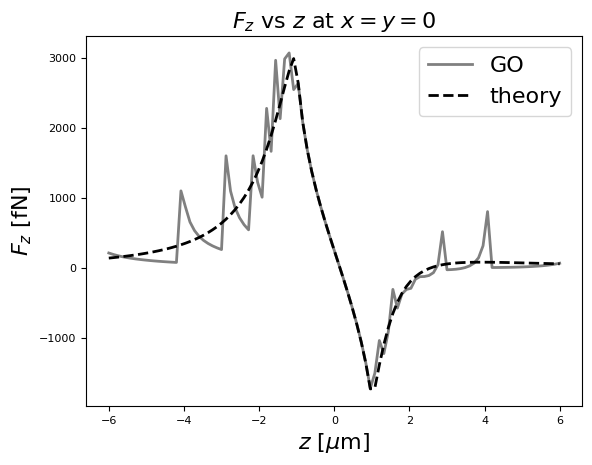

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Fz_vs_z_path = os.path.join("optical_forces", "Fz_vs_z.txt")
PositionMatrix_path = os.path.join("optical_forces", "PositionMatrix_100rays.npy")
ForcesMatrix_path = os.path.join("optical_forces", "ForcesMatrix_100rays.npy") 

# Theory
data_theory = [] 
with open(Fz_vs_z_path, "r") as file:
	for line in file:
		row = []
		for number in line.split(","):
			row.append(float(number))
		data_theory.append(row)

data_theory = np.array(data_theory)
z_theory = data_theory[:, 0]
data_theory = data_theory[:, 1] * 1e3

# Geometrical Optics (GO)
z_go = np.load(PositionMatrix_path)[50, 50, :, 2] 
fz_go = np.load(ForcesMatrix_path)[50, 50, :, 2] 

# Plot
plt.plot(z_go, fz_go, c="gray",linewidth=2, label="GO")
plt.plot(z_theory, data_theory, c="k", linewidth=2, linestyle="--", 
         label="theory")

plt.title("$F_z$ vs $z$ at $x=y=0$", fontsize=16)
plt.xlabel("$z$ [$\mu$m]", fontsize=16)
plt.ylabel("$F_z$ [fN]", fontsize=16)
plt.tick_params(axis="both", which="major", labelsize=8)
plt.legend(fontsize=16)

### cd:L02A:load1

Q: Why not make it platform independent immediately using os.path.join()?

In [2]:
# Three ways to make it platform indpendent
# 1.
import os
filename = os.path.join("optical_forces", "sphere_100rays", "force_grid_3D=1.txt")

# 2. 
import pathlib
filename = pathlib.Path("optical_forces", "sphere_100rays", "force_grid_3D=1.txt")

# 3.
filename = pathlib.Path("optical_forces", "sphere_100rays") / "force_grid_3D=1.txt"


def load_data_file(filename):
	data = []
	with open(filename, "r") as file:
		for line in file:
			row = []
			for number in line.split():
				row.append(float(number))
			data.append(row)
	return data

data = load_data_file(filename)

print(data)

[[1e-06, 1.5, -4e-06, -4e-06, -6e-06, 0.0, 0.0, 0.0], [1e-06, 1.5, -4e-06, -4e-06, -5.88e-06, 0.0, 0.0, 0.0], [1e-06, 1.5, -4e-06, -4e-06, -5.76e-06, -3.72116747e-14, 1.00147531e-13, 9.37947815e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.64e-06, -5.26836903e-14, 8.74218452e-14, 6.05429858e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.52e-06, -4.9819964e-14, 8.12791178e-14, 4.30265314e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.4e-06, -4.51660025e-14, 7.93116223e-14, 3.15445418e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.28e-06, -4.03687516e-14, 8.00212945e-14, 2.30190011e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.16e-06, -3.55484214e-14, 8.27964196e-14, 1.61476985e-14], [1e-06, 1.5, -4e-06, -4e-06, -5.04e-06, -3.05518893e-14, 8.78904553e-14, 1.05076465e-14], [1e-06, 1.5, -4e-06, -4e-06, -4.92e-06, -2.49297258e-14, 9.57831223e-14, 6.11818613e-15], [1e-06, 1.5, -4e-06, -4e-06, -4.8e-06, -1.72926603e-14, 1.07858132e-13, 3.53831233e-15], [1e-06, 1.5, -4e-06, -4e-06, -4.68e-06, -3.57522204e-15, 1.26474444e-13, 6.85451271

### cd:L02A:load3

In [3]:
from pathlib import Path

import numpy as np

def load_data_file(filename):
	data = []
	with open(filename, "r") as file:
		for line in file:
			row = []
			count = 0 #¡\circled{1}\circlednote{1}{initializes a counter to keep track of the number of elements in a row}¡
			for number in line.split(): 
				if 2 <= count <=4: #¡\circled{2}\circlednote{2}{skips the first two elements in the row.}¡
					row.append(float(number) * 1e6) #¡\circled{3}\circlednote{3}{converts the number from string to float and rescales positions in units of micrometers.}¡ 
				elif 5 <= count <= 7:
					row.append(float(number) * 1e15) #¡\circled{4}\circlednote{4}{converts the number from string to float and rescales forces in units of femtonewtons}¡					
				count += 1
			data.append(row)
	return np.array(data) #¡\circled{5}\circlednote{5}{converts the output to a numpy array.}¡

data = load_data_file(filename)

print(data)

[[  -4.          -4.          -6.           0.           0.
     0.       ]
 [  -4.          -4.          -5.88         0.           0.
     0.       ]
 [  -4.          -4.          -5.76       -37.2116747  100.147531
    93.7947815]
 ...
 [  -4.           4.           5.76      -137.597649   -27.1503227
    21.4702215]
 [  -4.           4.           5.88         0.           0.
     0.       ]
 [  -4.           4.           6.           0.           0.
     0.       ]]


### cd:L02A:loadall

In [4]:
data = np.empty((0, 6)) #¡\circled{1}\circlednote{1}{initializes an empty numpy array with six columns corresponding to the three positions and three force components.}¡
for i in range (1, 102):
	file_path = Path("optical_forces") / "sphere_100rays" / f"force_grid_3D={i}.txt" #¡\circled{2}\circlednote{2}{uses the \code{format()} method to insert the value of \code{i} into the filename string.}¡
	data = np.append(data, load_data_file(file_path), axis=0) #¡\circled{3}\circlednote{3}{The axis parameter in the \code{np.append()} function specifies the axis along which the values should be appended. A value of \code{axis=0} means that the values should be appended along the rows, so that the new values will be added as new rows in the array.}¡

print(np.shape(data)) #¡\circled{4}\circlednote{4}{should print \code{(1030301, 6)}, meaning that we have 1030301 data points.}¡

(1030301, 6)


### cd:L02A:split

Maybe add a circled note that explains that np.random.shuffle() is in-place, which is why we don't need to assign it to a new variable.

In [5]:
train_ratio = 0.8

np.random.shuffle(data)

train_size = int(len(data) * train_ratio)
data_train = data[:train_size]
data_validate = data[train_size:]

positions_train = data_train[:, :3] #¡\circled{1}\fourcirclednotes{1}{2}{3}{4}{separate the forces from the positions after shuffling the data. \E{Why after?}}¡
forces_train = data_train[:, 3:] #¡\circled{2}¡

positions_validate = data_validate[:, :3] #¡\circled{3}¡
forces_validate = data_validate[:, 3:] #¡\circled{4}¡

# cd:L02A:NN

I think we should move away from sigmoid already. It's known to cause vanishing gradients and unstable training. I think we should use ReLU already, so we don't enforce bad habits.

In [14]:
import deeplay as dl
import torch

# Pick one of the following many options based on what you like the most

# 1. If we use ReLU activation functions. 
mlp_model = dl.MultiLayerPerceptron(3, [256, 256, 256], 3)
regressor = dl.Regressor(mlp_model, loss=torch.nn.MSELoss, optimizer=torch.optim.Adam)

# 2. 
mlp_model = dl.MultiLayerPerceptron(
    3, [256, 256, 256], 3, 
    blocks=dl.Config().activation(torch.nn.Sigmoid)
)
regressor = dl.Regressor(mlp_model, loss=torch.nn.MSELoss, optimizer=torch.optim.Adam)

# 3.
mlp_model = dl.MultiLayerPerceptron.from_config(
    dl.Config()
    .in_features(3)
    .hidden_dims([256, 256, 256])
    .out_features(3)
    .blocks.activation(torch.nn.Sigmoid)
)
regressor = dl.Regressor(mlp_model, loss=torch.nn.MSELoss, optimizer=torch.optim.Adam)

# 4.
mlp_config = (
    dl.Config()
    .in_features(3)
    .hidden_dims([256, 256, 256])
    .out_features(3)
    .blocks.activation(torch.nn.Sigmoid)
)

regressor_config = (
    dl.Config()
    .model(dl.MultiLayerPerceptron, mlp_config)
    .loss(torch.nn.MSELoss)
    .optimizer(torch.optim.Adam)
)

regressor = dl.Regressor.from_config(regressor_config)

# 5.
regressor_config = (
    dl.Config()
    .model(dl.MultiLayerPerceptron, in_features=3, hidden_dims=[256, 256, 256], out_features=3)
    .model.blocks.activation(torch.nn.Sigmoid)
    .loss(torch.nn.MSELoss)
    .optimizer(torch.optim.Adam)
)

regressor = dl.Regressor.from_config(regressor_config)

# 6.
regressor_config = (
    dl.Config()
    .model(dl.MultiLayerPerceptron)
    .model.in_features(3)
    .model.hidden_dims([256, 256, 256])
    .model.out_features(3)
    .model.blocks.activation(torch.nn.ReLU)
    .loss(torch.nn.MSELoss)
    .optimizer(torch.optim.Adam)
)

regressor = dl.Regressor.from_config(regressor_config)

# -----------------------

print(regressor)

Regressor(
  (model): MultiLayerPerceptron(
    (in_features): 3
    (hidden_dims): [256, 256, 256]
    (out_features): 3
    (blocks): ModuleList(
      (0): Template(
        (layer): Linear(in_features=3, out_features=256, bias=True)
        (normalization): Identity()
        (activation): ReLU()
        (dropout): Identity()
      )
      (1): Template(
        (layer): Linear(in_features=256, out_features=256, bias=True)
        (normalization): Identity()
        (activation): ReLU()
        (dropout): Identity()
      )
      (2): Template(
        (layer): Linear(in_features=256, out_features=256, bias=True)
        (normalization): Identity()
        (activation): ReLU()
        (dropout): Identity()
      )
    )
    (out_layer): Linear(in_features=256, out_features=3, bias=True)
    (out_activation): Identity()
  )
  (loss): MSELoss()
)


### cd:L02A:NN

Note that the correct way to do this in pytorch is to have a dataset:

```python
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
```


In [15]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, idx):
        return (
            self.x[idx].astype(np.float32), 
            self.y[idx].astype(np.float32)
        )
    
train_dataset = MyDataset(positions_train, forces_train)
validate_dataset = MyDataset(positions_validate, forces_validate)

training_dataloader = dl.DataLoader(train_dataset, batch_size=1024)
validation_dataloader = dl.DataLoader(validate_dataset, batch_size=1024)

trainer = dl.Trainer(max_epochs=40, accelerator="auto")

trainer.fit(regressor, training_dataloader, validation_dataloader)

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                 | Params
-----------------------------------------------
0 | model | MultiLayerPerceptron | 133 K 
1 | loss  | MSELoss              | 0     
-----------------------------------------------
133 K     Trainable params
0         Non-trainable params
133 K     Total params
0.534     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [8]:
next(iter(training_dataloader))

[tensor([[-1.6000,  2.3200, -5.8800],
         [-1.5200,  1.8400,  4.8000],
         [ 2.3200, -3.6800,  5.4000],
         ...,
         [ 1.7600, -2.4800,  1.8000],
         [-1.7600,  2.7200, -1.5600],
         [ 3.5200, -0.1600,  3.9600]]),
 tensor([[ 128.8713, -125.9238,  134.5147],
         [  65.1949,  -41.8357,  151.6775],
         [   0.0000,    0.0000,    0.0000],
         ...,
         [  25.0375,    6.8091,   70.5209],
         [ 147.5631,  -20.1916,    9.8473],
         [ -47.3311,   39.0733,   63.0090]])]

In [1]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs --port 6006


Reusing TensorBoard on port 6006 (pid 42624), started 6:41:30 ago. (Use '!kill 42624' to kill it.)

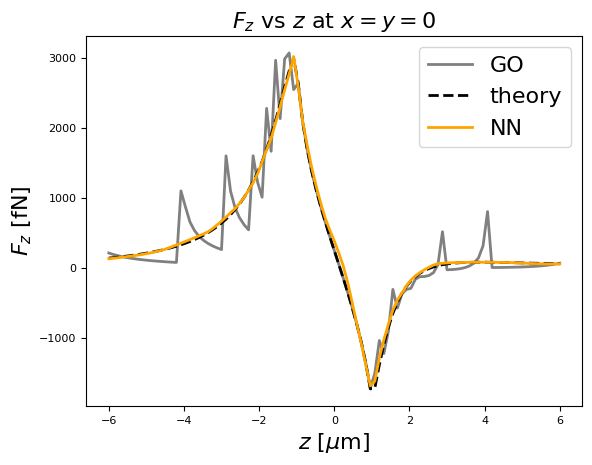

In [16]:
# NN
positions_nn = torch.zeros((z_theory.shape[0], 3)).to(regressor.device)
positions_nn[:, 2] = torch.from_numpy(z_theory)

# Predict. 
# cpu() collects the data from the GPU to the CPU. 
# detach() removes the gradient information. 
# numpy() converts the tensor to a numpy array.
forces_nn = regressor(positions_nn).cpu().detach().numpy()

fz_nn = forces_nn[:, 2]

# Plot
plt.plot(z_go, fz_go, c="gray",linewidth=2, label="GO")
plt.plot(z_theory, data_theory, c="k", linewidth=2, linestyle="--", 
         label="theory")
plt.plot(z_theory, fz_nn, c="orange",linewidth=2, label="NN")


plt.title("$F_z$ vs $z$ at $x=y=0$", fontsize=16)
plt.xlabel("$z$ [$\mu$m]", fontsize=16)
plt.ylabel("$F_z$ [fN]", fontsize=16)
plt.tick_params(axis="both", which="major", labelsize=8)
plt.legend(fontsize=16)

 ¡\circled{2}\circlednote{2}{uses \code{np.newaxis()} to increase the dimension of the numpy array to \code{(1, 1, 3)}.}¡

for the code below is incorrect. It should be \code{(1, 3)}. It first reduced dimensionality by 1 by doing [t - 1] and then added it back again with newaxis. I rewrote it to not use newaxis at all.

100%|██████████| 999/999 [00:00<00:00, 1112.96it/s]


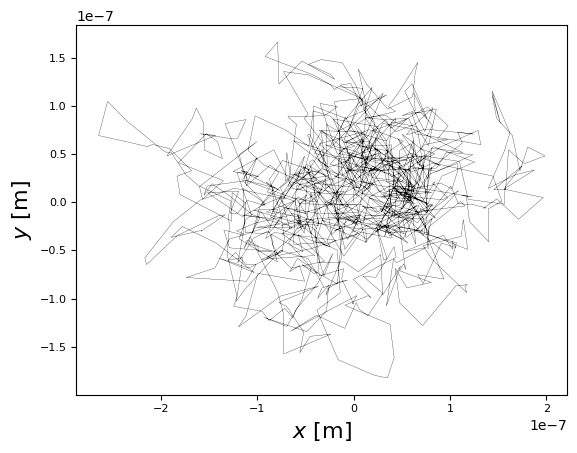

In [34]:
import math
import tqdm

# Parameters
kB = 1.3806e-23 # Boltzman constant [(kg m^2)/(K s^2)]

laser_power = 1e-3 # laser power [W]
T = 293 # absolute temperature [K]
R = 1.0e-6 # radius [m]
eta = 1e-3 # viscosity [Pa s]

gamma = 6 * math.pi * eta * R # friction coefficient
D = kB * T / gamma # diffusion coefficient

N = 1_000 # number of simulation steps
delta_t = 0.001 # simulation time step [s]

# Simulation
positions = np.zeros((N, 3))

for t in tqdm.tqdm(range(N - 1)):
	

    position_t_current = positions[t:t+1] # ¡\circled{2}\circlednote{2}{uses \code{np.newaxis()} to increase the dimension of the numpy array to \code{(1, 1, 3)}.}¡
    
    # as torch tensor
    position_t_current_nn = torch.from_numpy(position_t_current).float().to(regressor.device) * 1e6
    forces = regressor(position_t_current_nn).cpu().detach().numpy() * 1e-15 #¡\circled{3}\circlednote{3}{predicts the forces acting on the sphere at position \code{position\_t\_minus\_1}. It also rescales the position from microns to meters and, then, the resulting force from femtonewtons to Newtons.}¡

    new_position_delta = (
		  # COMMENT: precompute the constant factors? 
      laser_power / 0.005 / gamma * delta_t * forces +
      np.sqrt(2 * D * delta_t) * np.random.normal(0, 1, size=(1, 3))
    )

    new_position = position_t_current + new_position_delta[0]

    positions[t + 1] = new_position


# Plot
plt.plot(positions[:, 0], positions[:, 1], "k", linewidth=0.2)
# plt.xlim([-.3e-6, .3e-6])
# plt.ylim([-.3e-6, .3e-6])

plt.xlabel("$x$ [m]", fontsize=16)
plt.ylabel("$y$ [m]", fontsize=16)
plt.tick_params(axis="both", which="major", labelsize=8)
plt.gca().set_aspect("equal", "box")